In [66]:
import pandas as pd
df=pd.read_csv('copy_data.csv')

In [67]:
df['Day']=pd.to_datetime(df['Day'])

In [68]:
df['Day']

0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
2805   2024-09-06
2806   2024-09-07
2807   2024-09-08
2808   2024-09-09
2809   2024-09-10
Name: Day, Length: 2810, dtype: datetime64[ns]

In [69]:
df['Year']=df['Day'].dt.year
df['Month']=df['Day'].dt.month
df['Day']=df['Day'].dt.day

In [73]:
df.head()
df.drop('DayOfWeek',axis=1,inplace=True)

In [74]:
features = ['Day', 'Month', 'Year', 'Avg_Humidity', 'Avg_Rainfall', 'Avg_Temperature']
target = 'Avg_Electric_Consumption'

X = df[features].values
y = df[target].values

# Reshape X for LSTM [samples, time steps, features]
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train

array([[[1.00000000e+01, 1.00000000e+01, 2.02300000e+03, 5.35138163e+01,
         9.18498864e+00, 2.52923130e+01]],

       [[7.00000000e+00, 4.00000000e+00, 2.02200000e+03, 5.46955844e+01,
         1.01368439e+01, 2.58350119e+01]],

       [[2.60000000e+01, 1.20000000e+01, 2.01900000e+03, 5.46193895e+01,
         8.11773240e+00, 2.50586202e+01]],

       ...,

       [[5.00000000e+00, 2.00000000e+00, 2.02000000e+03, 5.37027093e+01,
         9.70151783e+00, 2.38702155e+01]],

       [[1.80000000e+01, 7.00000000e+00, 2.02000000e+03, 5.71858336e+01,
         9.14813122e+00, 2.25218437e+01]],

       [[1.10000000e+01, 5.00000000e+00, 2.01900000e+03, 5.75972277e+01,
         1.12268356e+01, 2.66748271e+01]]])

In [77]:
df[features]

,Day,Month,Year,Avg_Humidity,Avg_Rainfall,Avg_Temperature
0,1,1,2017,52.687346,7.163329,24.261809
1,2,1,2017,54.868454,8.508094,23.685218
2,3,1,2017,47.992009,8.497075,25.484136
3,4,1,2017,53.905718,8.901509,24.337097
4,5,1,2017,52.093167,11.762491,25.252514
...,...,...,...,...,...,...
2805,6,9,2024,53.617531,8.400031,23.309582
2806,7,9,2024,60.026102,10.297672,24.774016
2807,8,9,2024,55.938288,9.255521,24.839804
2808,9,9,2024,56.303219,11.206193,25.593159


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2, verbose=1)


Epoch 1/10


C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 155110.4219 - val_loss: 143098.0469
Epoch 2/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 139020.9375 - val_loss: 128033.0938
Epoch 3/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 124404.6094 - val_loss: 113898.0078
Epoch 4/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 110638.4609 - val_loss: 100629.8203
Epoch 5/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 97327.8672 - val_loss: 88210.9219
Epoch 6/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 85181.0312 - val_loss: 76639.7656
Epoch 7/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 73836.5703 - val_loss: 65914.0703
Epoch 8/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 63377.1172 - val_loss: 56028.8516
Epoch 9/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 53742.4414 - val_loss: 46977.8477
Epoch 10/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 44874.1016 - val_loss: 38759.1055


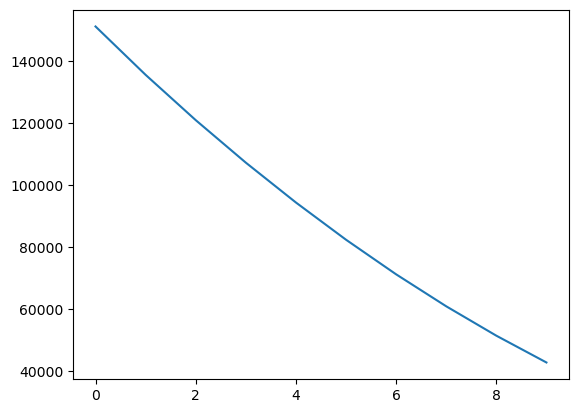

In [79]:
plt.plot(history.history['loss'])

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define a more complex model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = model.predict(X_test)

for i in range(len(y_test)):
    print(f"True value: {y_test[i]}, Predicted value: {y_pred[i][0]}")

Epoch 1/50


C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1798/1798 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 141340.7344 - val_loss: 102675.7500
Epoch 2/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 92577.0547 - val_loss: 65675.4531
Epoch 3/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 58083.2188 - val_loss: 38138.2031
Epoch 4/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 32797.1367 - val_loss: 18873.4551
Epoch 5/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 15438.5605 - val_loss: 7076.5752
Epoch 6/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5280.8418 - val_loss: 1532.4930
Epoch 7/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 980.9164 - val_loss: 118.3517
Epoch 8/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 75.5937 - val_loss: 38.5676
Epoch 9/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 40.2148 - val_loss: 38.5913
Epoch 10/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 40.2109 - val_loss: 38.7171
Epoch 11/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 40.3562 -

In [52]:
y_new_pred = model.predict(X_new_reshaped)

print(f"Predicted electric consumption: {y_new_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted electric consumption: 151.21331787109375


In [57]:
def predict_electric_Consumption(date_str,humidity,rainfall,temp):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')

    # Extract day, month, and year
    day = date_obj.day
    month = date_obj.month
    year = date_obj.year

    new_data = pd.DataFrame({
        'Day': [day],
        'Month': [month],
        'Year': [year],
        'Avg_Humidity': [humidity],
        'Avg_Rainfall': [rainfall],
        'Avg_Temperature': [temp]
    })

    # Prepare the input data
    X_new = new_data.values
    X_new_reshaped = X_new.reshape((X_new.shape[0], 1, X_new.shape[1]))
    y_new_pred = model.predict(X_new_reshaped)
    return y_new_pred[0][0]
    

In [65]:
predict_electric_Consumption('2024-01-03',53.0,7.5,24.0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


151.21332

In [55]:
from datetime import 

In [60]:
df.head()

,Day,Avg_Temperature,Avg_Humidity,Avg_Rainfall,Avg_Electric_Consumption,Year,Month
0,1,24.261809,52.687346,7.163329,405.167174,2017,1
1,2,23.685218,54.868454,8.508094,398.543438,2017,1
2,3,25.484136,47.992009,8.497075,407.468507,2017,1
3,4,24.337097,53.905718,8.901509,400.560122,2017,1
4,5,25.252514,52.093167,11.762491,396.406727,2017,1


In [80]:
X_test

array([[[2.00000000e+01, 3.00000000e+00, 2.02100000e+03, 5.33116545e+01,
         9.01166433e+00, 2.34827443e+01]],

       [[6.00000000e+00, 6.00000000e+00, 2.02300000e+03, 5.29290603e+01,
         1.12413561e+01, 2.38437860e+01]],

       [[2.00000000e+00, 7.00000000e+00, 2.02300000e+03, 5.31377463e+01,
         9.34699606e+00, 2.43990909e+01]],

       ...,

       [[2.90000000e+01, 8.00000000e+00, 2.02300000e+03, 5.73116776e+01,
         1.07655791e+01, 2.45577228e+01]],

       [[2.20000000e+01, 1.20000000e+01, 2.02200000e+03, 4.84400689e+01,
         1.05567551e+01, 2.43954372e+01]],

       [[2.00000000e+00, 1.00000000e+00, 2.02000000e+03, 5.44519632e+01,
         1.09724251e+01, 2.74656307e+01]]])

In [82]:
df.head()

,Day,Avg_Temperature,Avg_Humidity,Avg_Rainfall,Avg_Electric_Consumption,Year,Month
0,1,24.261809,52.687346,7.163329,405.167174,2017,1
1,2,23.685218,54.868454,8.508094,398.543438,2017,1
2,3,25.484136,47.992009,8.497075,407.468507,2017,1
3,4,24.337097,53.905718,8.901509,400.560122,2017,1
4,5,25.252514,52.093167,11.762491,396.406727,2017,1
